# Ensemble Techniques



combine multiple small models to make a large model

1. Bagging - RandomForest
2. Boosting - GradientBoost , xgboost

In [4]:
from warnings import filterwarnings

filterwarnings("ignore")

## Step 1 - Data Ingestion


Load the train data

In [5]:
import pandas as pd

df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target feature - Loan Status

1.     0 - Not Approved
2.     1 - Approved

## Step 2 - Perform basic data quality checks

In [6]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

## Step 3 - Seperate X and Y(loan_status)

In [9]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [10]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [11]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [12]:
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

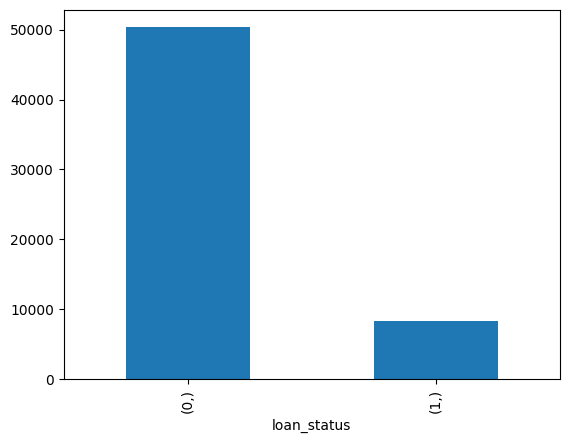

In [13]:
Y.value_counts().plot(kind="bar")

## Step 4 - Apply Prerpocessing on X

In [14]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [15]:
cat = list(X.columns[X.dtypes == "object"])
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [16]:
con = list(X.columns[X.dtypes != "object"])
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [19]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [20]:
pre = ColumnTransformer([("num", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## Step 5 - Apply train test split

In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [24]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [26]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [28]:
xtrain.shape

(46916, 22)

In [29]:
xtest.shape

(11729, 22)

## Step 6 - Model Building


1.RandomForest
2.GradientBoosting
3.xgboost



#### Random Forest 


In [30]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini",
    random_state=42,
)

model1.fit(xtrain, ytrain)

,n_estimators,1
,criterion,'gini'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
model1.score(xtrain, ytrain)

0.8892062409412567

In [32]:
model1.score(xtest, ytest)

0.8898456816437889

In [33]:
from sklearn.metrics import f1_score

ypred_test = model1.predict(xtest)
f1_score(ytest, ypred_test, average="macro")

0.721130272494571

## Hyperparameter Tuning

In [34]:
parmas1 = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 5],
    "criterion": ["gini", "entropy"],
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=42)
rscv_rfc = RandomizedSearchCV(
    rfc, param_distributions=parmas1, cv=5, scoring="f1_macro"
)
rscv_rfc.fit(xtrain, ytrain)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [36]:
rscv_rfc.best_params_

{'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}

In [37]:
rscv_rfc.best_score_

np.float64(0.8488877562843047)

In [38]:
best_rfc = rscv_rfc.best_estimator_
best_rfc

,n_estimators,100
,criterion,'entropy'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
best_rfc.score(xtrain, ytrain)

0.9360985591269503

In [40]:
best_rfc.score(xtest, ytest)

0.9364822235484696

In [41]:
ypred_test1 = best_rfc.predict(xtest)
ypred_test1[0:5]

array([0, 0, 0, 0, 0])

In [42]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [43]:
f1_score(ytest, ypred_test1, average="macro")

0.8473746688696291

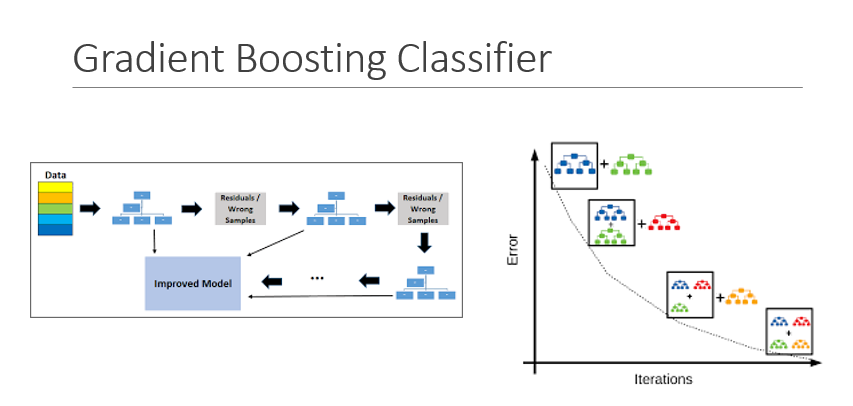

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    learning_rate=0.000001,
)

model2.fit(xtrain, ytrain)

,loss,'log_loss'
,learning_rate,1e-06
,n_estimators,1
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [45]:
model2.score(xtrain, ytrain)

0.8570210589138034

In [46]:
model2.score(xtest, ytest)

0.8600051155256203

In [47]:
ypred_test3 = model2.predict(xtest)
f1_score(ytest, ypred_test3, average="macro")

0.4623670700403374

## Hyperprameter Tuning

In [48]:
params2 = {
    "learning_rate": [0.1, 0.2],
    "max_depth": [3, 4, 5],
    "n_estimators": [100, 200],
}

In [49]:
gbc = GradientBoostingClassifier(random_state=42)

rscv_gbc = RandomizedSearchCV(
    gbc, param_distributions=params2, cv=5, scoring="f1_macro"
)
rscv_gbc.fit(xtrain, ytrain)

,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [50]:
rscv_gbc.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [51]:
rscv_gbc.best_score_

np.float64(0.8906847523134296)

In [52]:
best_gbc = rscv_gbc.best_estimator_
best_gbc

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [53]:
best_gbc.score(xtrain, ytrain)

0.9606317674141018

In [54]:
best_gbc.score(xtest, ytest)

0.9523403529712678

In [55]:
ypred_test4 = best_gbc.predict(xtest)
f1_score(ytest, ypred_test4, average="macro")

0.8928968629312638

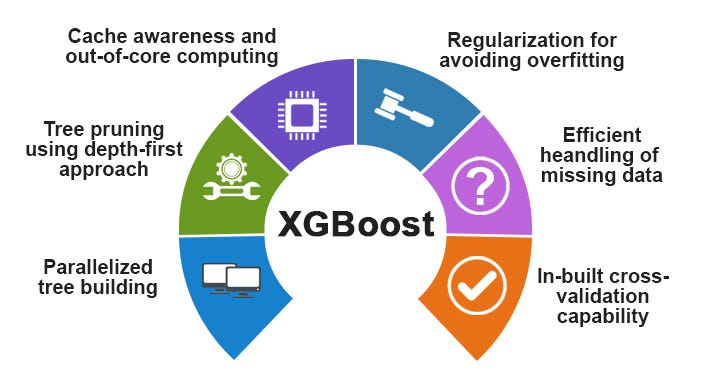

In [56]:
!uv add xgboost

Resolved 55 packages in 3ms
Audited 48 packages in 0.09ms


## xgboost - Extreme Gradient Boosting

In [57]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=3)
xgb_model.fit(xtrain, ytrain)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
xgb_model.score(xtrain, ytrain)

0.9534913462358258

In [59]:
xgb_model.score(xtest, ytest)

0.951828800409242

In [60]:
ypred_test5 = xgb_model.predict(xtest)
f1_score(ytest, ypred_test5, average="macro")

0.8917472764868766

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.88612192, 0.88312251, 0.90102378, 0.89408589, 0.88284058])

In [62]:
scores.mean()

np.float64(0.8894389343605802)

## Based on time taken and cross validated f1 macro i choose xgboost model for out of sample prediction


## Feature Importances

In [63]:
xgb_model.feature_importances_

array([0.00754038, 0.02257299, 0.02579451, 0.00588174, 0.07279877,
       0.24239808, 0.0029241 , 0.00282679, 0.04737979, 0.13168196,
       0.01469335, 0.02639195, 0.05190515, 0.01226042, 0.02074645,
       0.00959866, 0.02198689, 0.2613268 , 0.01049817, 0.00269002,
       0.00131785, 0.00478526], dtype=float32)

In [64]:
xtrain.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [65]:
imp = pd.Series(xgb_model.feature_importances_, index=xtrain.columns)
imp

num__person_age                     0.007540
num__person_income                  0.022573
num__person_emp_length              0.025795
num__loan_amnt                      0.005882
num__loan_int_rate                  0.072799
num__loan_percent_income            0.242398
num__cb_person_cred_hist_length     0.002924
cat__person_home_ownership_OTHER    0.002827
cat__person_home_ownership_OWN      0.047380
cat__person_home_ownership_RENT     0.131682
cat__loan_intent_EDUCATION          0.014693
cat__loan_intent_HOMEIMPROVEMENT    0.026392
cat__loan_intent_MEDICAL            0.051905
cat__loan_intent_PERSONAL           0.012260
cat__loan_intent_VENTURE            0.020746
cat__loan_grade_B                   0.009599
cat__loan_grade_C                   0.021987
cat__loan_grade_D                   0.261327
cat__loan_grade_E                   0.010498
cat__loan_grade_F                   0.002690
cat__loan_grade_G                   0.001318
cat__cb_person_default_on_file_Y    0.004785
dtype: flo

In [66]:
sorted_imp = imp.sort_values(ascending=False)
sorted_imp

cat__loan_grade_D                   0.261327
num__loan_percent_income            0.242398
cat__person_home_ownership_RENT     0.131682
num__loan_int_rate                  0.072799
cat__loan_intent_MEDICAL            0.051905
cat__person_home_ownership_OWN      0.047380
cat__loan_intent_HOMEIMPROVEMENT    0.026392
num__person_emp_length              0.025795
num__person_income                  0.022573
cat__loan_grade_C                   0.021987
cat__loan_intent_VENTURE            0.020746
cat__loan_intent_EDUCATION          0.014693
cat__loan_intent_PERSONAL           0.012260
cat__loan_grade_E                   0.010498
cat__loan_grade_B                   0.009599
num__person_age                     0.007540
num__loan_amnt                      0.005882
cat__cb_person_default_on_file_Y    0.004785
num__cb_person_cred_hist_length     0.002924
cat__person_home_ownership_OTHER    0.002827
cat__loan_grade_F                   0.002690
cat__loan_grade_G                   0.001318
dtype: flo

<Axes: >

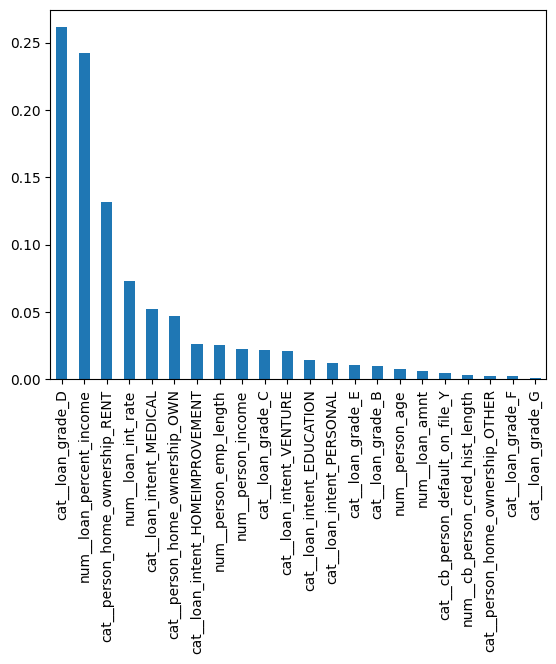

In [67]:
sorted_imp.plot(kind="bar")

<Axes: >

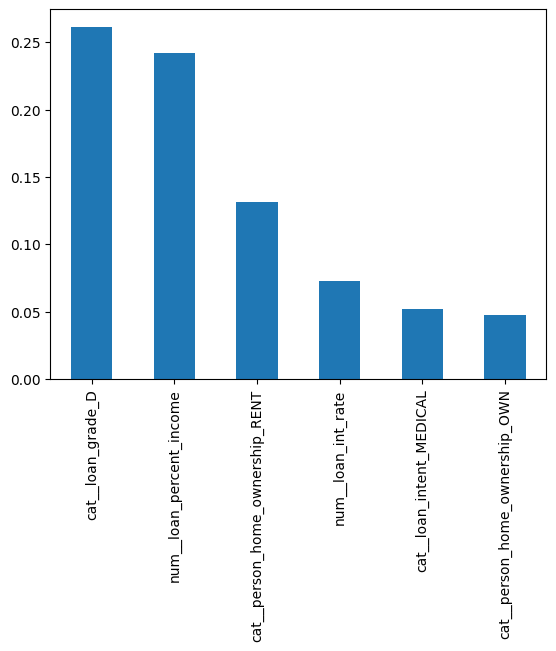

In [68]:
sorted_imp[0:6].plot(kind="bar")

## Step 7 - Model evaluatation

In [69]:
xgb_model.score(xtrain, ytrain)


0.9534913462358258

In [70]:
xgb_model.score(xtest, ytest)

0.951828800409242

In [71]:
from sklearn.metrics import classification_report

print(classification_report(ypred_test5, ytest))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10380
           1       0.74      0.90      0.81      1349

    accuracy                           0.95     11729
   macro avg       0.86      0.93      0.89     11729
weighted avg       0.96      0.95      0.95     11729



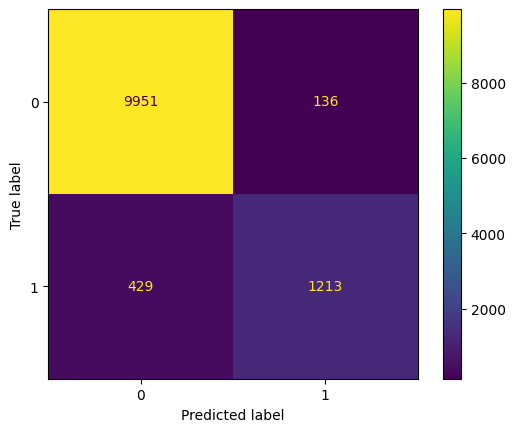

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, xtest, ytest)

## Step 8 - Out of sample prediction


In [73]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [74]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [75]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.920057,-0.865950,-0.682117,-1.117510,-0.101452,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39094,-0.920057,-0.423038,0.328047,-0.398572,-1.531591,-0.100746,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39095,3.886707,-0.106673,-1.187200,1.039305,-1.043894,0.989873,4.761895,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39096,-0.920057,-0.739404,-0.177035,0.859570,1.628554,2.516741,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [76]:
preds = xgb_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 0, 0, 0])

In [77]:
probs = xgb_model.predict_proba(xnew_pre)
probs[0:5]

array([[0.0047698 , 0.9952302 ],
       [0.97373927, 0.02626074],
       [0.6209419 , 0.37905812],
       [0.99308914, 0.00691086],
       [0.91843605, 0.08156396]], dtype=float32)

In [78]:
xgb_model.classes_

array([0, 1])

In [79]:
probs_approved = probs[:, 1]
probs_approved[0:5]

array([0.9952302 , 0.02626074, 0.37905812, 0.00691086, 0.08156396],
      dtype=float32)

In [80]:
res = xnew[["id"]]
res

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [81]:
res["loan_status"] = preds
res["approval_prob"] = probs_approved.round(4)

In [82]:
res

,id,loan_status,approval_prob
0,58645,1,0.9952
1,58646,0,0.0263
2,58647,0,0.3791
3,58648,0,0.0069
4,58649,0,0.0816
...,...,...,...
39093,97738,0,0.0816
39094,97739,0,0.0062
39095,97740,0,0.0115
39096,97741,0,0.3546


In [83]:
res["loan_status"].value_counts()

loan_status
0    34809
1     4289
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

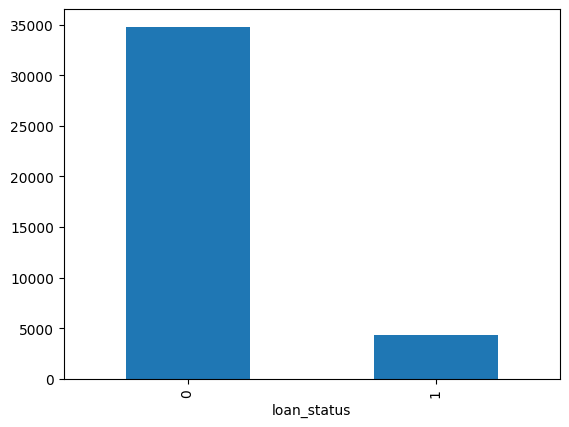

In [84]:
res["loan_status"].value_counts().plot(kind="bar")

## Step 9 - Save the selected model and preprocessor


In [85]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [86]:
xgb_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [87]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [88]:
joblib.dump(xgb_model, "xgb_model.joblib")

['xgb_model.joblib']

In [89]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [90]:
m = joblib.load("xgb_model.joblib")
m

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [91]:
m.score(xtest, ytest)

0.951828800409242